### Retrieve Sup3rCC Data Efficiently
This demonstrates how to use an FGEM utility to download and query sup3rcc data for a single year and multiple locations in a vectorized manner. This utility does not download the weather data itself (terabytes!!!). Rather, it captures the corresponding metadata to query the data from NREL AWS on the fly. 

In [1]:
# Only needed when FGEM is NOT installed by user
import sys
sys.path.insert(1, '../')

import os
import zarr
from kerchunk.hdf import SingleHdf5ToZarr
import fsspec
import ujson
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fgem.weather import download_query_sup3rcc

In [2]:
data_type = "wind"
attribute = "windspeed_100m"
year = 2050
lat = np.random.randint(24.521208, 49.382808, size=10)
long = np.random.randint(-124.736342, -66.945392, size=10)

df = download_query_sup3rcc(year, lat, long, data_type, attribute)

Retrieve metadata from NREL AWS for wind_2050 ... 
Compute weather at coordinates ...


Text(0.5, 0, 'Hour')

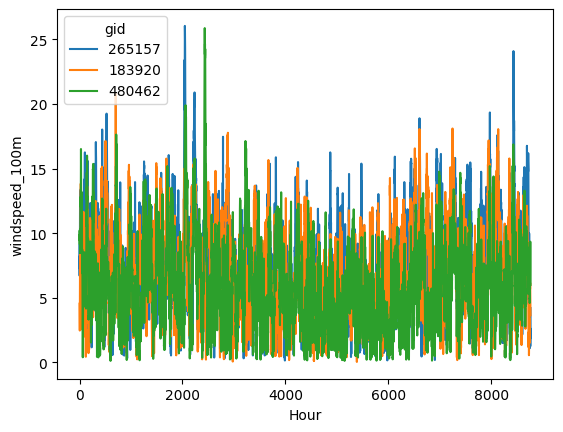

In [3]:
# visualize 3 locations
num = 3
plt.plot(df[:num][list(range(1, 8761))].T, label=df[:num]["gid"].astype(int))
plt.legend(loc="upper left", title="gid")
plt.ylabel(attribute)
plt.xlabel("Hour")